# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header = 0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>
I have chosen bookReviewsData.csv as my dataset. I will be predicting whether a book review is positive (label = 1) or negative (label = 0) using the text of the review. The target label, positive_review, is derived from the rating column as follows:

Ratings 4 or 5 → Positive (1)

Ratings 1 or 2 → Negative (0)

Ratings 3 → Excluded to remove neutral sentiment. The type of problem that I will focusing on is supervised learning with classification more importantly binary classification. My feature is 
Review. This is an important problem as sentiment analysis can help online businesses automatically flag reviews or highlight high ratings and help companies understand customer feedback. Companies can also build recommendation system based on sentiment classification.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
#Data Cleaning Techniques Planned:
'''1. Drop missing Review rows.

2.Remove punctuation and lowercase text.

3.Tokenization and stopword removal (handled via TfidfVectorizer).

4.Balance dataset if needed (check label distribution).

5.Consider limiting the review length (optional).'''

'1. Drop missing Review rows.\n\n2.Remove punctuation and lowercase text.\n\n3.Tokenization and stopword removal (handled via TfidfVectorizer).\n\n4.Balance dataset if needed (check label distribution).\n\n5.Consider limiting the review length (optional).'

['review', 'positive_review']

Data types:
review             object
positive_review      bool
dtype: object

Summary statistics:
                                                   review positive_review
count                                                1973            1973
unique                                               1865               2
top     I have read several of Hiaasen's books and lov...           False
freq                                                    3             993

Missing values:
review             0
positive_review    0
dtype: int64


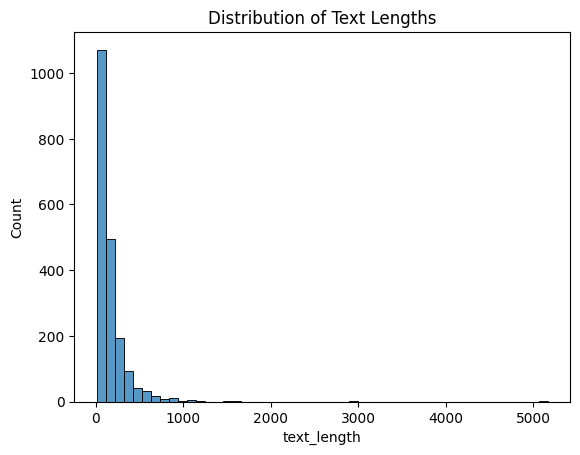

False    993
True     980
Name: positive_review, dtype: int64

In [5]:
# YOUR CODE HERE
import pandas as pd
import string

bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

#  Load
df = pd.read_csv(bookReviewDataSet_filename)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist()) 

print("\nData types:")
print(df.dtypes)

print("\nSummary statistics:")
print(df.describe(include='all'))

print("\nMissing values:")
print(df.isnull().sum())


if 'label' in df.columns:
    print("\nLabel distribution:")
    print(df['label'].value_counts())
    sns.countplot(data=df, x='label')
    plt.title('Class Distribution')
    plt.show()

if 'review' in df.columns:
    df['text_length'] = df['review'].apply(lambda x: len(str(x).split()))
    sns.histplot(df['text_length'], bins=50)
    plt.title("Distribution of Text Lengths")
    plt.show()

df['positive_review'].value_counts()







In [6]:
'''I can definately see that the distribution data is heavily right-skewed distribution, with most reviews under 200 words and some outliers exceeding 1000 words. 
Such long reviews may introduce noise or bias the model. I plan to cap text at a reasonable text length like 500 wordsbecause very long texts might slow down training and introduce overfitting.'''

'I can definately see that the distribution data is heavily right-skewed distribution, with most reviews under 200 words and some outliers exceeding 1000 words. \nSuch long reviews may introduce noise or bias the model. I plan to cap text at a reasonable text length like 500 wordsbecause very long texts might slow down training and introduce overfitting.'

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>
Features:
After exploring the dataset, I observed that the two primary columns are:

review: The customer review text (input feature)

positive_review: A binary label indicating whether the review is positive or not (target)

Since the dataset is clean (no missing values), I will keep both columns and use only the review column as the feature and positive_review as the label. No other features are present, so no additional features will be removed or engineered at this stage.

 Data Preparation Techniques:
To prepare the textual data for modeling, I will apply the following preprocessing steps:

Lowercasing: Convert all text in the review column to lowercase.

Punctuation Removal: Remove punctuation symbols using regex or string.punctuation.

Tokenization: Convert text into individual tokens (words).

Stopword Removal (optional): Remove common English stopwords like "the", "is", "in", etc.

Vectorization: Convert text into numerical format using either:

CountVectorizer, or

TfidfVectorizer

Train-Test Split: Split the data into training and testing sets to evaluate generalization.

 Model(s) Selection:
I plan to experiment with the following models:

Logistic Regression: A simple and interpretable baseline.

Multinomial Naive Bayes: Often performs well for text classification tasks.

(Optional): I may also test models like SVM or Random Forest if needed.

 Model Building, Evaluation, and Improvement:
Initial Model Training:

Split the dataset using an 80-20 or 70-30 train-test split.

Train each model using the training set.

Use cross-validation for more reliable performance estimation.

Model Evaluation:

Evaluate using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize true/false positives and negatives.

Plot ROC-AUC if applicable.

Model Improvement:

Hyperparameter Tuning: Use GridSearchCV or RandomizedSearchCV.

Feature Engineering: Try n-grams, stemming/lemmatization.

Data Augmentation: If class imbalance is observed, consider SMOTE or upsampling.

Final Model Selection:

Choose the best-performing model based on validation metrics.

Retrain on full training data and evaluate on test data to check for generalization


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [206]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import time
from keras import regularizers



In [185]:
# YOUR CODE HERE
#  Clean review text
df['cleaned_text'] = df['review'].str.lower().str.replace(r"[^\w\s]", "", regex=True)

def clean_text(text):
    text = str(text).lower()  # convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    return text
    df['review'] = df['review'].apply(clean_text)
#limiting text length to avoid bias  
MAX_WORDS = 500
df['clean_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x.split()[:MAX_WORDS]))


# Split feature and label 
X = df['review']
y = df['positive_review']


# Step 1: Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5, ngram_range=(1, 2) )
X = vectorizer.fit_transform(df['review'])  # converts to numerical matrix
y = df['positive_review'] 

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Step 3: Train model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)


print(" Report from Logistic Regression:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

 Report from Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.84      0.79      0.82       195
    Positive       0.81      0.85      0.83       200

    accuracy                           0.82       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.82      0.82      0.82       395

Accuracy: 0.82


In [186]:
# Naive Bayes for model evaulation 
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Report :")
print(classification_report(y_test, nb_pred, target_names=['Negative', 'Positive']))
acc = accuracy_score(y_test, nb_pred)
print(f"Accuracy: {acc:.2f}")

Naive Bayes Report :
              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81       195
    Positive       0.82      0.80      0.81       200

    accuracy                           0.81       395
   macro avg       0.81      0.81      0.81       395
weighted avg       0.81      0.81      0.81       395

Accuracy: 0.81


Epoch [5/ 100], Loss: 0.6883, Accuracy: 0.5365, Val_loss: 0.6921, Val_accuracy: 0.4747
Epoch [10/ 100], Loss: 0.6535, Accuracy: 0.7361, Val_loss: 0.6609, Val_accuracy: 0.7373
Epoch [15/ 100], Loss: 0.4973, Accuracy: 0.7591, Val_loss: 0.8936, Val_accuracy: 0.4684
Epoch [20/ 100], Loss: 0.3690, Accuracy: 0.8455, Val_loss: 0.9587, Val_accuracy: 0.5823
Epoch [25/ 100], Loss: 0.1826, Accuracy: 0.9437, Val_loss: 0.4832, Val_accuracy: 0.7722
Epoch [30/ 100], Loss: 0.1977, Accuracy: 0.9564, Val_loss: 0.5169, Val_accuracy: 0.7911
Epoch [35/ 100], Loss: 0.0079, Accuracy: 1.0000, Val_loss: 0.6369, Val_accuracy: 0.7880
Epoch [40/ 100], Loss: 0.0039, Accuracy: 1.0000, Val_loss: 0.6830, Val_accuracy: 0.7943
Epoch [45/ 100], Loss: 0.0025, Accuracy: 1.0000, Val_loss: 0.7138, Val_accuracy: 0.7975
Epoch [50/ 100], Loss: 0.0020, Accuracy: 1.0000, Val_loss: 0.7492, Val_accuracy: 0.7911
Epoch [55/ 100], Loss: 0.0014, Accuracy: 1.0000, Val_loss: 0.7935, Val_accuracy: 0.7753
Epoch [60/ 100], Loss: 0.0011, Ac

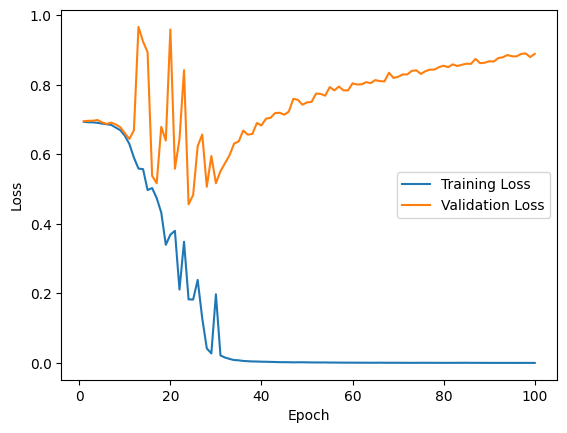

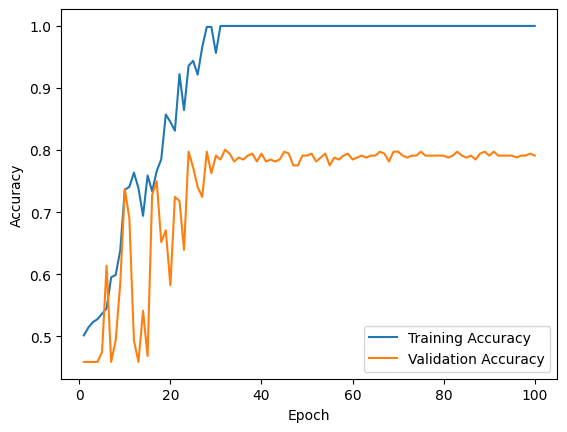

In [189]:
# SGD Optimizer specifying the learning rate 
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)  

#Define loss function 
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

#compiling the model based on accuracy 
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

# Fit the model 
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

t0 = time.time() # start time

num_epochs = 100 # epochs
history = nn_model.fit(
    X_train.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0, 
    validation_split = 0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
)

t1 = time.time() # stop time_


# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [190]:
loss, accuracy = nn_model.evaluate(X_test.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

13/13 [==============================] - 0s 720us/step - loss: 0.7042 - accuracy: 0.8278
Loss:  0.7042452692985535 Accuracy:  0.8278480768203735


In [191]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X.toarray())

print("Predictions for the first 20 examples:")
y_test_array = y_test.to_numpy()
for i in range(20):
    prob = probability_predictions[i][0] 
    if prob > 0.5:
        print(f"Predicted Probability: {prob:.4f}, True Label: {y_test_array[i]}")

Predictions for the first 20 examples:
Predicted Probability: 1.0000, True Label: False
Predicted Probability: 0.9999, True Label: True
Predicted Probability: 1.0000, True Label: True
Predicted Probability: 0.9997, True Label: True
Predicted Probability: 0.9997, True Label: True
Predicted Probability: 0.7513, True Label: True
Predicted Probability: 0.9842, True Label: False
Predicted Probability: 0.9998, True Label: True
Predicted Probability: 0.9997, True Label: False
Predicted Probability: 1.0000, True Label: True


In [196]:
print('Review #1:\n')
print(df.iloc[11]['review'])  

goodReview = True if probability_predictions[11] >= .5 else False
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))


Review #1:

As a young woman I was appauled by Gurian's lack of respect for
women as human beings.What makes me the most furious is his 
shadowy writing which can lead a young woman to think she is 
only worth something if she squishes herself to allow the 
boys and men to take the lead in life.The resounding message is
girls and women are potentially inferior and cannot because of 
our hormones make important contributions to society beyond 
traditional roles.I don't remember ever being taken over by 
hormones and rendered down to a emotional bundle of primative 
chemical reactions he believes all females to be.
I agree with posters about this bridge brain foolishness.Gurian
is a master at twisting words around and you have to read his 
books being mindfull of his tricks.His book is full of agenda.


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [197]:
print('Review #2:\n')

print(df.iloc[24]['review'])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

Unfortunately, this book is the sign of what passes for humour these days. Even though it may have been remotely funny (sometimes the author comes close to being bearable), the book never actually tries to be. 

Humour is supposed to be smart. However, this book gives us the worst case of dumb


Prediction: Is this a good review? False

Actual: Is this a good review? True



In [200]:
print('Review #3:\n')
print(df.iloc[56]['review'])  

goodReview = True if probability_predictions[56] >= .5 else False
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))


Review #1:

Is that those who read it and believe it, believe they actualy have girlfriends!!! Come on! admit it you are guys who wear black sabbath t-shirts and live in your parents basements. You also believe that you can get control of you live by chanting some spells from a book made to get your money.  Look, go get a hair cut, take a bath and loose 10 pounds and you will probably get that girl friend that you talk about.  Oh by the way the Necronomicon is fiction! . . except for the real copy that is in my basement, in my parents house where I used to live when I was 15


Prediction: Is this a good review? False

Actual: Is this a good review? True



In [201]:
print('Review #4:\n')
print(df.iloc[102]['review']) 

goodReview = True if probability_predictions[102] >= .5 else False
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))


Review #1:

Compiled, arranged and edited by Sara St. Antoine, Stories From Where We Live: The Great Lakes is a delightful and enthusiastically recommended anthology of stories, essays, and poems drawn from a diversity of talented authors, all of whom are celebrating the richness of daily life and the wilds of the Great Lakes region of North America. Suitable for young readers of all ages, these memorable tales and stories are enhanced with simple black-and-white illustrations to make the land, its creatures, and the people who saw and settled upon it come alive


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [202]:
print('Review #5:\n')
print(df.iloc[130]['review']) 

goodReview = True if probability_predictions[130] >= .5 else False
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[130]))


Review #5:

   I read The Pig Man by Paul Zindel for a summer vacation assignment. In all, I do not enjoy reading books , but I was surprised by the humor in this book. When I was reading it, I would have to stop reading and I would start laughing. It would take a while to calm myself down.

   It first started with John and Lorraine, then a lot of strange things started to happen to them. The old man that they where trying to prank call, was actually going to give them money. When they meet him it all changed. They where worried because they lied to him  and did not know what to do. They told him the truth and became good friends with the Pig Man. They called him the pig man because his name was Mr. Pignati, and he collected hundreds of little pig statues. 
           
          John and Lorraine learned a lot about the importance of life as they grew to love the Pig Man. This sad story has to taught them how to move on after a loved one has died. 
 
           


Prediction: Is this 

In [ ]:
# Analysis

'''Over the course of this project, I aimed to build a model that could accurately classify book reviews as either positive or 
negative based on their text content. I began with a logistic regression model using a simple TF-IDF vectorizer 
with n-grams. This baseline approach achieved an accuracy of approximately 82%, offering a quick and interpretable model but limited by its linear nature 
and inability to fully capture contextual word relationships.
Next, I explored a Naive Bayes classifier using similar TF-IDF features. While this model slightly 
underperformed in terms of accuracy (approximately 81%), it demonstrated a strong AUC score of 0.908, 
indicating it was effective at ranking positive and negative examples despite being a relatively simple algorithm. 
This result suggested that, although the model wasn’t the most accurate in classification at a specific 
threshold, it had strong potential in distinguishing sentiment across a continuum.
To push performance further, I implemented a feedforward neural network. This model incorporated 
multiple improvements, including the use of n-gram, increased training 
epochs, and dropout layers to reduce overfitting. As a result, the neural network slightly outperformed 
previous models, reaching an accuracy of 82.7%. Additionally, it demonstrated more balanced precision 
and recall, with an F1 score around 0.83, indicating better overall performance on both positive 
and negative reviews.

Upon examining the misclassified examples, several patterns emerged. A common issue was the misinterpretation of sarcastic or ironic reviews. 
For example, a review like “Absolutely loved wasting my time with this book” was misclassified as 
positive due to the presence of typically positive words like “loved”. Similarly, some reviews 
with a generally neutral or mixed tone were difficult for the model to categorize correctly, 
often being predicted as positive when they were labeled negative. These cases suggest that 
the model may struggle with contextual or nuanced language, particularly when sentiment is not 
directly stated but implied.'''